# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data
data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
# percentages of nulls on each column
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df.duplicated().unique()

array([False])

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Data Types (Categorical Data & type conversion )        <br>
2- Handling Null Values          <br>
3- Feature Scaling          <br>

In [8]:
df_copy = df.copy()

In [9]:
all_cols = df_copy.columns
all_cols

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
df_copy.select_dtypes(include=np.number).columns.tolist()

['Population', 'Area (sq. mi.)', 'GDP ($ per capita)']

In [11]:
cat_cols = ['Country', 'Region']
num_cols = all_cols.difference(cat_cols) 


In [12]:
for col in num_cols:
    df_copy[col] = df_copy[col].replace(',','.',regex=True)
    df_copy[col] = df_copy[col].astype('float')

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [14]:
#df_copy['Country'].unique()

In [15]:
# percentages of nulls on each column
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [16]:
# Fill Missing Data
#df[i].fillna(df[i].mean(),inplace=True)
df_copy.fillna(df_copy.mean(),inplace=True)

**Second issue**

In [17]:
#solution 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [18]:
# categorical data dropping
df_copy.drop(['Country', 'Region'], inplace=True, axis=1)

In [19]:
df_copy

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,3581655.0,28748.0,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,32930091.0,2381740.0,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,57794.0,199.0,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,71201.0,468.0,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492.0,5860.0,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,273008.0,266000.0,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,21456188.0,527970.0,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,11502010.0,752614.0,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [20]:
df_copy.drop_duplicates(keep = False, inplace = True)

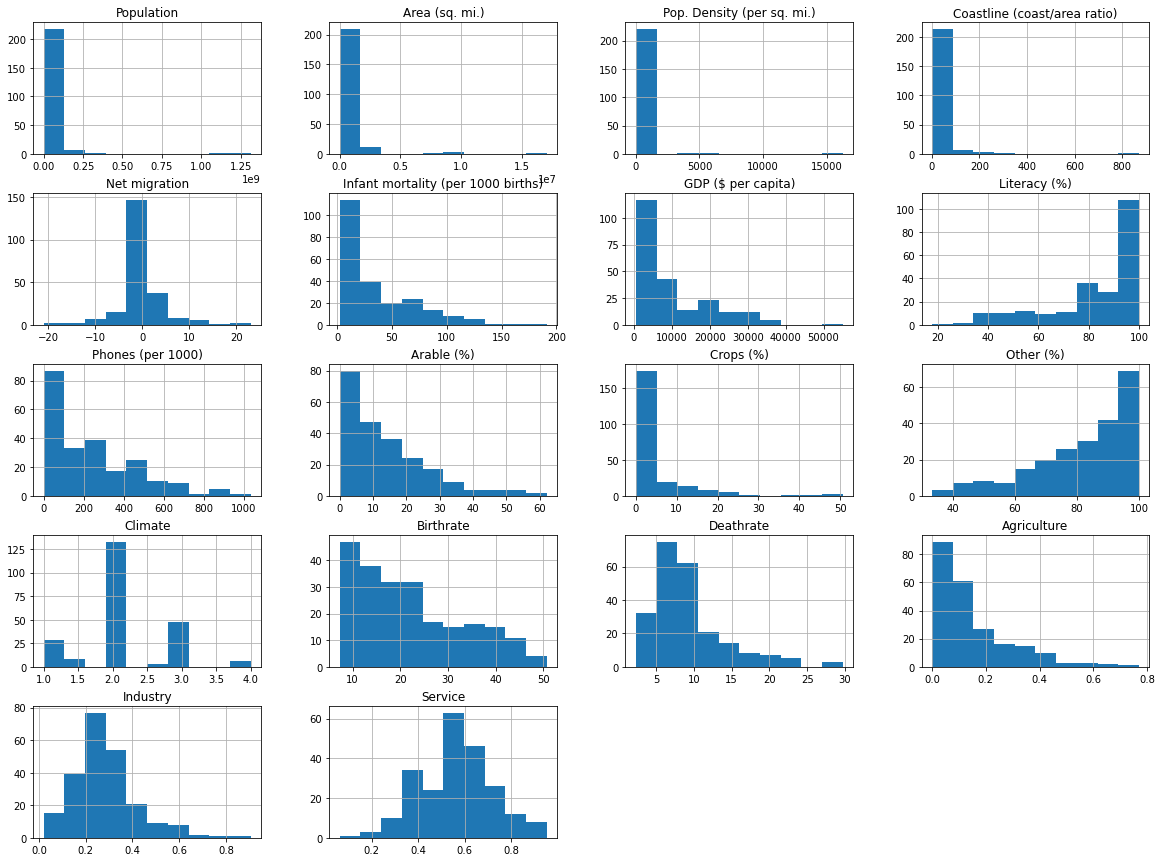

In [21]:
# test
df_copy.hist(figsize=(20,15))
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler().fit(df_copy)

data_strd = scaler.transform(df_copy)

df_strd = pd.DataFrame(data_strd)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [28]:
df_strd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.019695,0.027583,-0.199844,-0.293443,4.750696e+00,3.636688e+00,-8.985536e-01,-2.481004e+00,-1.032796e+00,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075e+00,1.619132e+00,-3.211494e-01,-1.158818
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201e+00,-3.987536e-01,-5.187348e-01,1.939599e-01,-7.312001e-01,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-8.149012e-01,5.734169e-01,-7.121448e-01,0.085790
2,0.035618,0.998421,-0.220490,-0.292889,-8.834605e-02,-1.284888e-01,-3.688063e-01,-6.800381e-01,-7.005969e-01,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-9.385141e-01,-3.521823e-01,2.385742e+00,-1.671672
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495e+00,-7.479882e-01,-1.689017e-01,7.501404e-01,1.039557e-01,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057e+00,1.961110e-16,4.173963e-16,0.000000
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081e+00,-8.968049e-01,9.305737e-01,9.090492e-01,1.158212e+00,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-6.061780e-01,1.961110e-16,4.173963e-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,6.070728e-01,-4.529206e-01,-8.885583e-01,-7.527430e-16,-4.029923e-01,0.239532,1.734375,-1.091961,1.298569,0.862560,-1.078338e+00,-4.299044e-01,-2.038365e-02,0.404760
223,-0.242004,-0.185982,-0.228217,-0.287620,-4.295642e-18,-4.051365e-16,1.818122e-16,-7.527430e-16,3.781713e-16,-1.063546,-0.549507,1.143937,-1.717937,0.000000,7.199359e-16,1.961110e-16,4.173963e-16,-1.033732
224,-0.061923,-0.039330,-0.204312,-0.288452,-7.867312e-03,7.410341e-01,-8.885583e-01,-1.728836e+00,-8.819983e-01,-0.850483,-0.520612,0.956833,-1.717937,1.875396,-1.907579e-01,-1.119504e-01,1.423292e+00,-1.077512
225,-0.146545,0.086427,-0.219584,-0.293443,-7.867312e-03,1.504789e+00,-8.885583e-01,-1.185606e-01,-1.010620e+00,-0.518538,-0.545895,0.702371,-0.209684,1.704784,2.165991e+00,4.886292e-01,5.480778e-02,-0.477098


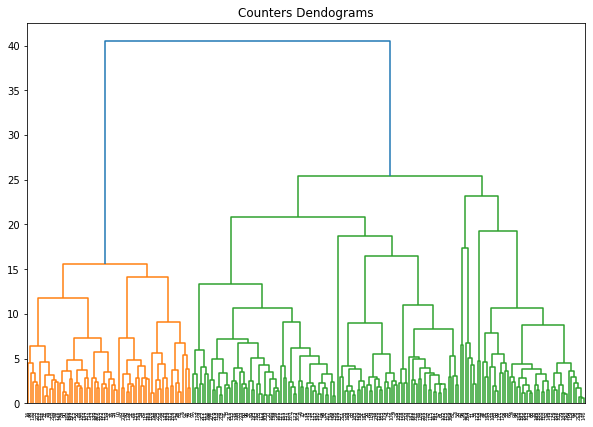

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_strd , method='ward',metric='euclidean')) #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
model = AgglomerativeClustering(n_clusters=5)
model = model.fit(data_strd)

In [30]:
labels = model.labels_

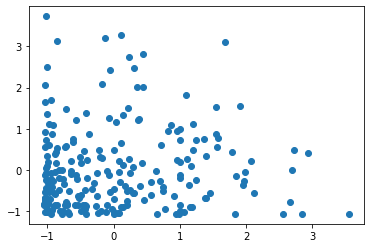

In [31]:
X = data_strd[:, [8,9]]
plt.scatter(X[:, 0], X[:, 1])

In [32]:
# relate points with its current clusters
cluster_df = pd.concat([pd.DataFrame(X),
                    pd.DataFrame(labels, columns=['cluster'])],
                    axis=1)

In [33]:
filtered_c1 = cluster_df[cluster_df['cluster'] == 0]
filtered_c2 = cluster_df[cluster_df['cluster'] == 1]
filtered_c3 = cluster_df[cluster_df['cluster'] == 2]
filtered_c4 = cluster_df[cluster_df['cluster'] == 3]
filtered_c5 = cluster_df[cluster_df['cluster'] == 4]

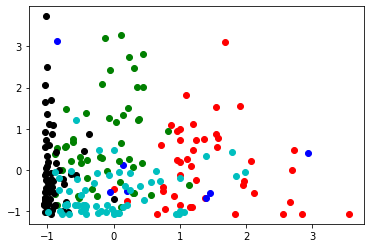

In [34]:
#filter rows of original data
#Plotting the results
plt.scatter(filtered_c1[0] , filtered_c1[1] , c = 'r')
plt.scatter(filtered_c2[0] , filtered_c2[1] , color = 'b')
plt.scatter(filtered_c3[0] , filtered_c3[1] , color = 'g')
plt.scatter(filtered_c4[0] , filtered_c4[1] , color = 'k')
plt.scatter(filtered_c5[0] , filtered_c5[1] , color = 'c')
plt.show()

In [81]:
ss =silhouette_score(data_strd, labels)
ss

0.15091468804802352

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA()
pca.fit(X2)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.29805844, 0.43583299, 0.53890625, 0.62611531, 0.69926618,
       0.75533695, 0.80455657, 0.84362537, 0.87704149, 0.90706043,
       0.93332639, 0.95625672, 0.97706096, 0.98751417, 0.99513123,
       0.99986306, 0.99999999, 1.        ])

In [67]:
best_dim = np.argmax(cumsum >= 0.95) + 1
best_dim

12

In [68]:
X2 = data_strd
# Set the n_components=3
principal=PCA(n_components=12)
principal.fit(X2)
data_pca=principal.transform(X2)
 
# Check the dimensions of data after PCA
print(data_pca.shape)

(227, 12)


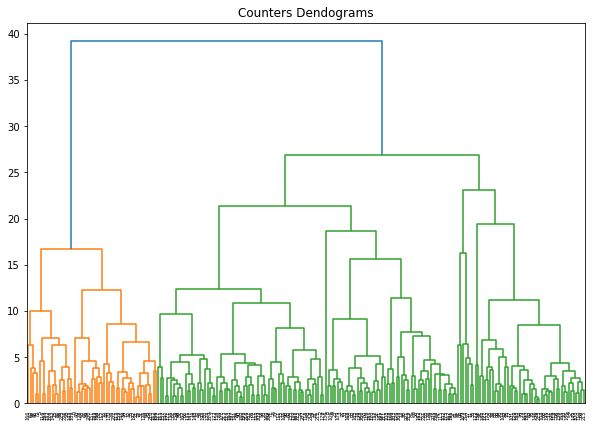

In [69]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_pca , method='ward',metric='euclidean')) #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [70]:
model = AgglomerativeClustering(n_clusters=5)
model = model.fit(data_pca)
labels = model.labels_

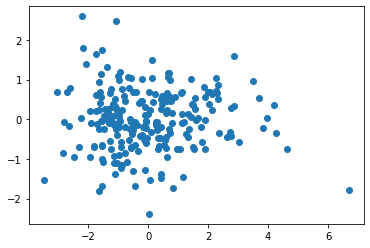

In [73]:
X = data_pca[:, [1,8]]
plt.scatter(X[:, 0], X[:, 1])

In [74]:
# relate points with its current clusters
cluster_df = pd.concat([pd.DataFrame(X),
                    pd.DataFrame(labels, columns=['cluster'])],
                    axis=1)

In [75]:
filtered_c1 = cluster_df[cluster_df['cluster'] == 0]
filtered_c2 = cluster_df[cluster_df['cluster'] == 1]
filtered_c3 = cluster_df[cluster_df['cluster'] == 2]
filtered_c4 = cluster_df[cluster_df['cluster'] == 3]
filtered_c5 = cluster_df[cluster_df['cluster'] == 4]

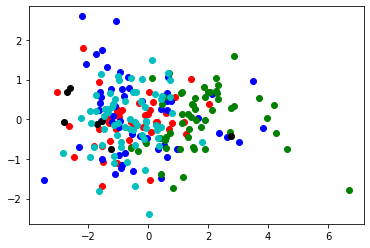

In [76]:
#filter rows of original data
#Plotting the results
plt.scatter(filtered_c1[0] , filtered_c1[1] , c = 'r')
plt.scatter(filtered_c2[0] , filtered_c2[1] , color = 'b')
plt.scatter(filtered_c3[0] , filtered_c3[1] , color = 'g')
plt.scatter(filtered_c4[0] , filtered_c4[1] , color = 'k')
plt.scatter(filtered_c5[0] , filtered_c5[1] , color = 'c')
plt.show()

In [80]:
ss =silhouette_score(data_pca, labels)
ss

0.16122660516470103